<a href="https://colab.research.google.com/github/fosky95/AA_PRACTICA1_GRUPO6/blob/Practica1/AA_PRACTICA1_GRUPO6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GRUPO 6
##PEDRO GARCÍA SILGO
## JAVIER RODRIGUEZ GARCÍA

# INTRODUCCIÓN AL PROBLEMA
> Crear un modelo de Redde Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones. Para ello se tendrá que crear un modelo en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST, precargado en Keras y muy parecido al que vimos en clase de reconocimiento de números. Fashion-MNISTes un conjunto de datos de las imágenes de los artículos de Zalando (www.zalando.com), una tienda de moda online alemana especializada en ventas de ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles):

Para empezar con el problema, se importan todas las librerías:


In [ ]:
#importar todas las librerías
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

#También importamos la librería matliblob para "pintar"
import matplotlib.pyplot as plt

#Se importan las librerías necesarias para crear la arquitectura de la red.
from keras import models
from keras import layers

#Para preparar las etiquetas:
# from keras import utils
# from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

#Importar las siguientes librería para la matriz de confusión
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np


2.6.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


También nos aseguramos de que la versión de Tensor Flow es la de 2.0.0. o superior y de que estamos trabajando con GPUs.

In [ ]:
#CARGAMOS EL CONJUNTO DE DATOS DE ZALANDO
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(train_images0, train_labels0), (test_images0, test_labels0) = (train_images, train_labels), (test_images, test_labels)

A continuación comprobamos las imágenes que tenemos:

In [ ]:
print(train_images.shape)
# Vemos la matriz de la imagen número 1 (28x28)
print(train_images[1])
print(train_labels[1])

(60000, 28, 28)
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  4

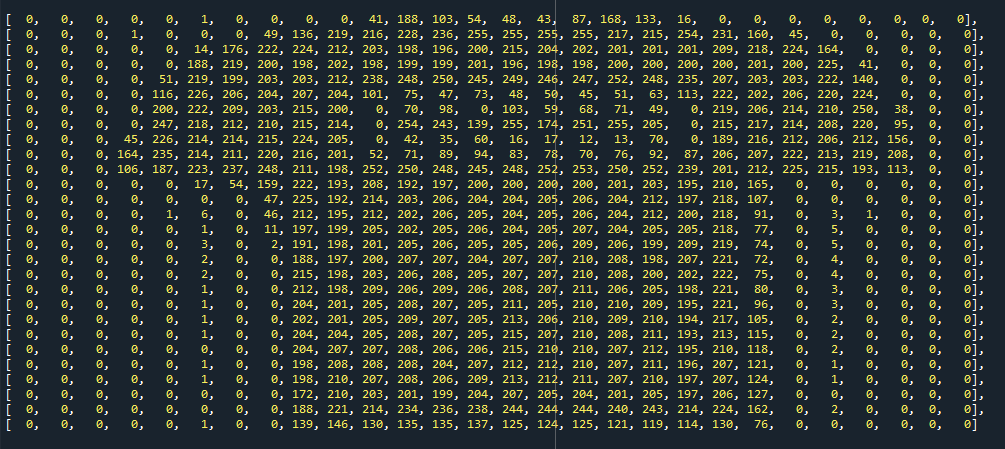

Esta es la primera imagen, lo que parece una camiseta. (La etiqueta 0 que ha salido es la de la camiseta)

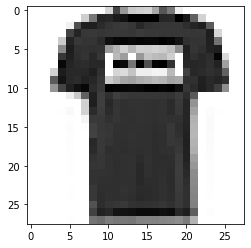

In [ ]:
imagen = train_images[1]
plt.imshow(imagen, cmap=plt.cm.binary)
plt.show()

Esta es una imagen de la camiseta pintada con matliblob.

Y a cada una de las imágenes que hemos importado tienen asignada una etiqueta que indica qué prenda de ropa es cada imagen:

0.   Camiseta
1.   Pantalón
2.   Jersey
3.   Vestido
4.   Cazadora
5.   Sandalia
6.   Camisa
7.   Zapatillas
8.   Bolso
9.   Bota

In [ ]:
#Comprobamos las etiquetas de cada imagen.
print(len(train_labels))
print(train_labels)

#También miramos la forma de los datos que tenemos
print(test_images.shape) 
print(len(test_labels))

60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


Ahora normalizamos los datos (las imágenes de las prendas) para que converja más rápido.

In [ ]:
# 5.- PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el 
# tensor inicial
train_images = train_images.reshape((60000, 28 * 28))
train_images, len(train_images), train_images.shape, train_images[1]


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 60000,
 (60000, 784),
 array([  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216,
        228, 236, 255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 176, 222, 224,
        212, 203, 198, 196, 200, 215, 204, 202, 201, 201, 201, 209, 218,
        224, 164,   0,   0,   0,   0,   0,   0,   0,   0,   0, 188, 219,
        200, 198, 202, 198, 199, 199, 201, 196, 198, 198, 200, 200, 200,
        200, 201, 200, 225,  41,   0,   0,   0,   0,   0,   0,   0,  51,
        219, 199, 203, 203, 212, 238, 248, 250, 245, 249, 246, 247, 252,
        248, 235, 207

In [ ]:
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[1]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078432, 0.7372549 , 0.40392157, 0.21176471, 0.1882353 ,
        0.16862746, 0.34117648, 0.65882355, 0.52156866, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.        , 0.        ,
        0.19215687, 0.53333336, 0.85882354, 0.84705883, 0.89411765,
        0.9254902 , 1.        , 1.        , 1.        , 1.        ,
        0.8509804 , 0.84313726, 0.99607843, 0.90588236, 0.627451  ,
        0.1764706 , 0.        , 0

In [ ]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[1] # Posición 0 a 9 donde solo el 0 tiene probabilidad 1, porque estamos con la camiseta.

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Aquí dejo las funciones de predicción

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

A continuación se crea la RNA:

 Para empezar, se probaran los datos del primer caso:
-10 neuronas, función act: relu y optimizador: sigmoidea.

#Caso 1

In [ ]:
# El tipo de red será secuencial, por lo que, desde la entrada hasta la salida será sin ciclos, es decir, que será unidireccional (las neuronas posteriores no se conectaran con las anteriores en ese sentido)
network = models.Sequential(name='Modelo_Zalando')
# Creamos dos capas "Dense" (Neurona1 y Neurona2), que son capas neuronales densamente conectadas 
# (también llamadas "completamente conectadas"). Cada una de las X(en función del ejercicio) neuronas de
# la capa de entrada están conectadas con los 784 píxeles = 28*28 (las imágenes). Solo lo 
# definimos para la primera capa. Para la segunda capa y posteriores, Keras lo 
# deduce.
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name='Neurona1'))
# Capa de salida "softmax" de 10 vías (o neuronas). Significa que  
# devolverá una matriz de 10 puntuaciones de probabilidad (sumando 1)
# La puntuación será la probabilidad de que la imagen del dígito actual 
# pertenezca a una de nuestras clases de 10 dígitos.
network.add(layers.Dense(10, activation='softmax', name='Neurona2'),)
# Cada capa aplica unas cuantas operaciones con tensores sencillas a los datos
# de entrada, y que estas operaciones implican tensores de pesos. Los tensores
# de peso, que son los atributos de las capas, son donde persiste el 
# "conocimiento" de la red.
# En general, la capa de salida de una red de clasificación tendrá tantas
# neuronas como clases, menos en la clasificación binaria, que con 1 vale. Cada 
# valor será la probabilidad de que la imagen del dígito actual pertenezca a cada
# una de las clases
network.summary()
# Nombre de las capas automáticos a no ser que lo definamos
# 401.920 = 784 x 512 + 512 Sesgo
# 5.130 = 512x10 + 10 Sesgo
# 407.050 = 401.920 + 5.130

Model: "Modelo_Zalando"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Neurona1 (Dense)             (None, 10)                7850      
_________________________________________________________________
Neurona2 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Según el summary, tenemos 2 capas neuronales de tipo dense de las cuales cada neurona de la primera capa estyá conectada a cada una de la segunda capa y, de la segunda capa salen 10 "respuestas" que equivaldrían a cada tipo de prenda de ropa.

La función de perdida que usamos siempre tiene que ser binary crossentropy (según lo dicho en clase).

In [ ]:
# 4.- HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
# Algoritmo optimizador rmsprop (Root Mean Square Propagation): Es un algoritmo que mantiene 
# un factor de entrenamiento diferente para cada dimensión, pero en este caso el escalado 
# del factor de entrenamiento se realiza dividiéndolo por la media del declive 
# exponencial del cuadrado de los gradientes.
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# La reducción de la pérdida se produce mediante el descenso de gradiente
# estocástico minilote, cuyas reglas exactas están gobernadas por el optimizador
# 'rmsprop'
# 'accuracy': Solo tendremos en cuenta la fracción de imágenes que son
# correctamente clasificadas 

Ahora vamos a entrenar el sistema de neuronas con fit:
Para el entrenamiento, usamos 5 épocas, pero cambiamos la función de pérdida como se indica el enunciado.

In [ ]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
# * epochs: Épocas: un límite arbitrario, definido como 
# "una pasada sobre todo el conjunto de datos", que se utiliza para 
# separar el entrenamiento en distintas fases, que es útil para el 
# registro y la evaluación periódica. Como no hay initial_epoch, en
# este caso va hasta la época 5 desde 1.
# tamaño del lote
# * batch_size: Entero o NULO. Número de muestras por actualización de gradiente. 
# Si no se especifica, batch_size se establecerá de forma predeterminada en 32.
network.fit(train_images, train_labels, epochs=5, batch_size=128)
# La red empezará a iterar por lo datos de entrenamiento en minilotes de 128
# muestras, 5 veces (cada iteración por los datos de entrenamiento recibe el 
# nombre de "repetición"). En cada iteración, la red computará los gradientes de
# los pesos en relación con la pérdida en el lote y ajustará los pesos en
# consecuencia. Tras estas 5 repeticiones, la red habrá realizado 2.345 ajustes
# de gradiente (469 por repetición), la pérdida será lo bastante baja como para
# que la red sea capaz de clasificar números escritos a mano con gran exactitud.

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.6725 - accuracy: 0.4072
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 1.0457 - accuracy: 0.6615
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.7981 - accuracy: 0.7451
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6918 - accuracy: 0.7656
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6363 - accuracy: 0.7780


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.6396 - accuracy: 0.7715


In [ ]:
print('Precisión del test:', test_acc)
# test_acc: 0.9777

Precisión del test: 0.7714999914169312


La precisión del test resulta ser algo menos de 80%. A continuación realizaremos la matriz de confusión.

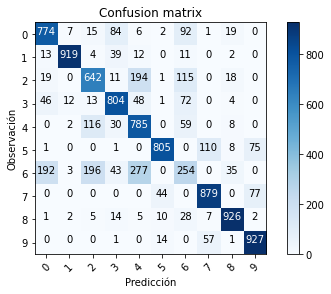

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')


    # Predict the values from the validation dataset
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

En la matriz de confusión se pueden apreciar la cantidad de veces que ha hacertado la RNA (la diagonal de la matriz) y la cantidad de veces que ha fallado con otra prenda distinta.

Este ha sido el resultado del caso 1. A continuación, se harán el resto. 
Para los siguientes casos, se puede empezar directamente creando la red neuronal puesto que los datos anteriores sabemos qué están bien.
En este caso, cambiamos la funcion sigmoidea por la rmsprop.

Como se puede ver en la matriz, hay varias prendas que se pueden confundir con otras pero, en general, acierta bastante.

## Apartado 4

Para este apartado, se compararán partes de las imagenes de prueba con el resto de las propias imagenes de prueba. Hay 60k imágenes. Podemos separar 50k y 10k para hacer la prueba:


**IMPORTANTE: No ejecutar este entrenamiento ni los siguientes si se entrenó anteriormente la RNA.**

In [ ]:
train_images1= train_images[:50000]
train_labels1=train_labels[:50000]
test_images1=train_images[50000:]
test_labels1=train_labels[50000:]


In [ ]:
network.fit(train_images1, train_labels1, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 1s 3ms/step - loss: 0.6034 - accuracy: 0.7887
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 0.5816 - accuracy: 0.7976
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.5640 - accuracy: 0.8036
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.5495 - accuracy: 0.8101
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.5372 - accuracy: 0.8150


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images1, test_labels1)

313/313 [==============================] - 1s 3ms/step - loss: 0.5381 - accuracy: 0.8111


In [ ]:
print('Precisión del test:', test_acc)
# test_acc: 0.9777

Precisión del test: 0.8111000061035156


##Apartado 5

Para este apartado, vamos a predecir la imagen 6

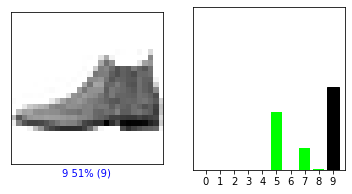

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels0, test_images0.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels0)
plt.show()

#Caso 2

In [ ]:
network = models.Sequential(name='Modelo_Zalando2')
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name='Neurona1'))
network.add(layers.Dense(10, activation='softmax', name='Neurona2'),)
network.summary()


Model: "Modelo_Zalando2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Neurona1 (Dense)             (None, 10)                7850      
_________________________________________________________________
Neurona2 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Según el summary, tenemos 2 capas neuronales de tipo dense de las cuales cada neurona de la primera capa estyá conectada a cada una de la segunda capa y, de la segunda capa salen 10 "respuestas" que equivaldrían a cada tipo de prenda de ropa.

Ahora cambiamos el optimizador:

In [ ]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.8629 - accuracy: 0.7145
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5340 - accuracy: 0.8175
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4864 - accuracy: 0.8315
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4592 - accuracy: 0.8409
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4442 - accuracy: 0.8457


In [ ]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4701 - accuracy: 0.8368


In [ ]:
print('Precisión del test:', test_acc)

Precisión del test: 0.8367999792098999


En este caso, la precisión del test es másd del 80% por haber cambiado el optimizador. 

Ahora viene la matriz de confusión:

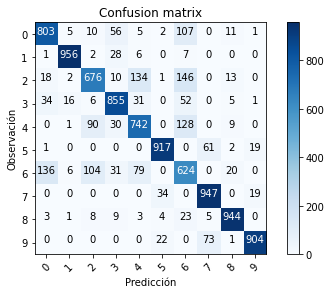

In [ ]:
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

##Apartado 4


**IMPORTANTE: No ejecutar este entrenamiento ni los siguientes si se entrenó anteriormente la RNA.**

In [ ]:
train_images1= train_images[:50000]
train_labels1=train_labels[:50000]
test_images1=train_images[50000:]
test_labels1=train_labels[50000:]


In [ ]:
network.fit(train_images1, train_labels1, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 0.4308 - accuracy: 0.8507
Epoch 2/5
391/391 [==============================] - 1s 4ms/step - loss: 0.4224 - accuracy: 0.8536
Epoch 3/5
391/391 [==============================] - 1s 4ms/step - loss: 0.4164 - accuracy: 0.8563
Epoch 4/5
391/391 [==============================] - 2s 4ms/step - loss: 0.4111 - accuracy: 0.8586
Epoch 5/5
391/391 [==============================] - 1s 4ms/step - loss: 0.4052 - accuracy: 0.8608


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images1, test_labels1)

313/313 [==============================] - 1s 3ms/step - loss: 0.4342 - accuracy: 0.8488


In [ ]:
print('Precisión del test:', test_acc)
# test_acc: 0.9777

Precisión del test: 0.848800003528595


##Apartado 5

Para este apartado, vamos a predecir la imagen 6

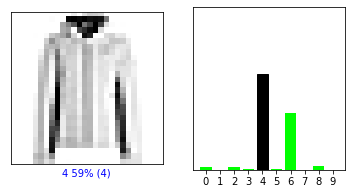

In [ ]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels0, test_images0.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels0)
plt.show()

#Caso 3


In [ ]:
network = models.Sequential(name='Modelo_Zalando3')
network.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name='Neurona1'))
network.add(layers.Dense(10, activation='softmax', name='Neurona2'),)
network.summary()

Model: "Modelo_Zalando3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Neurona1 (Dense)             (None, 10)                7850      
_________________________________________________________________
Neurona2 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Según el summary, tenemos 2 capas neuronales de tipo dense de las cuales cada neurona de la primera capa estyá conectada a cada una de la segunda capa y, de la segunda capa salen 10 "respuestas" que equivaldrían a cada tipo de prenda de ropa.
En este caso, se ha cambiado la función de activación, pero a simple visa, no parece haber alterado nada del problema anterior.

Volvemos a cambiar el optimizador:

In [ ]:
network.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 2.0750 - accuracy: 0.2737
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 1.7780 - accuracy: 0.5224
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 1.5777 - accuracy: 0.6140
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4217 - accuracy: 0.6457
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 1.2977 - accuracy: 0.6675


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.2504 - accuracy: 0.6751


In [ ]:
print('Precisión del test:', test_acc)

Precisión del test: 0.6751000285148621


Para el caso 3, la precisión ha bajado bastante por cambiar de función de activación.

A continuación se muestra la matrix de confusión:

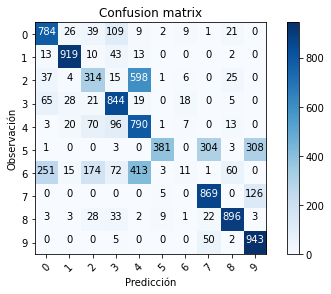

In [ ]:
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se pueden apreciar que en algunas prendas tiende a equivocarse.

##Apartado 4

**IMPORTANTE: No ejecutar este entrenamiento ni los siguientes si se entrenó anteriormente la RNA.**

In [ ]:
train_images1= train_images[:50000]
train_labels1=train_labels[:50000]
test_images1=train_images[50000:]
test_labels1=train_labels[50000:]


In [ ]:
network.fit(train_images1, train_labels1, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 1s 3ms/step - loss: 1.2056 - accuracy: 0.6835
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 1.1359 - accuracy: 0.6948
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 1.0773 - accuracy: 0.7036
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 1.0278 - accuracy: 0.7122
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.9856 - accuracy: 0.7174


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images1, test_labels1)

313/313 [==============================] - 1s 3ms/step - loss: 0.9653 - accuracy: 0.7263


In [ ]:
print('Precisión del test:', test_acc)
# test_acc: 0.9777

Precisión del test: 0.7263000011444092


##Apartado 5

Para este apartado, vamos a predecir la imagen 6

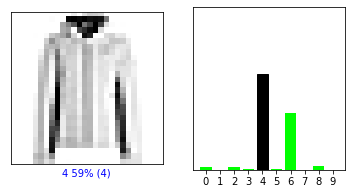

In [ ]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels0, test_images0.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels0)
plt.show()

##Apartado 7

Mejorar este caso usando el optimizador adam y la funcion de perdida sparse_categorical_crossentropy

In [ ]:
network = models.Sequential(name='Modelo_Zalando3')
network.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name='Neurona1'))
network.add(layers.Dense(10, activation='softmax', name='Neurona2'),)
network.summary()

Model: "Modelo_Zalando3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Neurona1 (Dense)             (None, 10)                7850      
_________________________________________________________________
Neurona2 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


ValueError: ignored

Hay un problema al usar el nuevo optimizador con la función de pérdida.

#Caso 4

Se mantiene la función de activación sigmoid

In [ ]:
network = models.Sequential(name='Modelo_Zalando4')
network.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,), name='Neurona1'))
network.add(layers.Dense(10, activation='softmax', name='Neurona2'),)
network.summary()

Model: "Modelo_Zalando4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Neurona1 (Dense)             (None, 10)                7850      
_________________________________________________________________
Neurona2 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Según el summary, tenemos 2 capas neuronales de tipo dense de las cuales cada neurona de la primera capa estyá conectada a cada una de la segunda capa y, de la segunda capa salen 10 "respuestas" que equivaldrían a cada tipo de prenda de ropa. 

A estas alturas, podríamos asumir que, en el summary no va a cambiar nada a pesar de que cambiemos la función de activación (ni el optimizador). Eso si, al cambiar el numero de neuronas, como pasará a continuación, veremos cambios.

Ahora volvemos al optimizador rmsprop

In [ ]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.4844 - accuracy: 0.5913
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.8522 - accuracy: 0.7865
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6270 - accuracy: 0.8120
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5407 - accuracy: 0.8251
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4982 - accuracy: 0.8340


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5165 - accuracy: 0.8225


In [ ]:
print('Precisión del test:', test_acc)

Precisión del test: 0.8224999904632568


Para el caso 4, con sigmoid y rmsprop, hemos mejorado del caso anterior. Se podría decir que esta combinación de función de activación y optimizador es mejor que la del caso 3.

Ahora se mostrará la matriz de confusión:

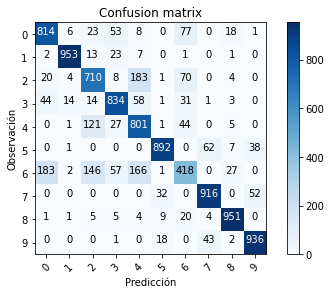

In [ ]:
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Efectivamente, falla menos que el caso anterior.

##Apartado 4

**IMPORTANTE: No ejecutar este entrenamiento ni los siguientes si se entrenó anteriormente la RNA.**

In [ ]:
train_images1= train_images[:50000]
train_labels1=train_labels[:50000]
test_images1=train_images[50000:]
test_labels1=train_labels[50000:]


In [ ]:
network.fit(train_images1, train_labels1, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 1s 4ms/step - loss: 0.4747 - accuracy: 0.8388
Epoch 2/5
391/391 [==============================] - 1s 4ms/step - loss: 0.4590 - accuracy: 0.8430
Epoch 3/5
391/391 [==============================] - 1s 4ms/step - loss: 0.4470 - accuracy: 0.8451
Epoch 4/5
391/391 [==============================] - 1s 4ms/step - loss: 0.4366 - accuracy: 0.8487
Epoch 5/5
391/391 [==============================] - 1s 4ms/step - loss: 0.4282 - accuracy: 0.8509


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images1, test_labels1)

313/313 [==============================] - 1s 3ms/step - loss: 0.4400 - accuracy: 0.8478


In [ ]:
print('Precisión del test:', test_acc)
# test_acc: 0.9777

Precisión del test: 0.8478000164031982


##Apartado 5

Para este apartado, vamos a predecir la imagen 6

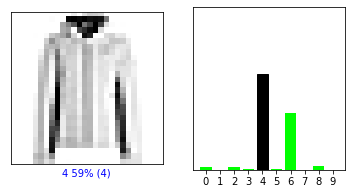

In [ ]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels0, test_images0.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels0)
plt.show()

#Caso 5

A partir de este caso, aumentamos el número de neuronas a 512 (en la primera capa), a ver si apreciamos algun cambio.

Usamos la función relu de nuevo y con el optimizador sgd:

In [ ]:
network = models.Sequential(name='Modelo_Zalando5')
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,), name='Neurona1'))
network.add(layers.Dense(10, activation='softmax', name='Neurona2'),)
network.summary()

Model: "Modelo_Zalando5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Neurona1 (Dense)             (None, 512)               401920    
_________________________________________________________________
Neurona2 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Aqí lo que cambia es el número de interacciones entre las neuronas, que serán más. Por el resto, sigue comportándose como las anteriores.

In [ ]:
network.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.0042 - accuracy: 0.6970
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6510 - accuracy: 0.7940
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5758 - accuracy: 0.8143
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5361 - accuracy: 0.8244
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5098 - accuracy: 0.8314


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5235 - accuracy: 0.8234


In [ ]:
print('Precisión del test:', test_acc)

Precisión del test: 0.8234000205993652


En el caso 5, al haber aumentado las neuronas, ha aumentado ligeramente la precisión en comparación con el caso 1 (que tiene la misma función de activación y optimizador que este caso).

A continuación, la matriz de confusión.

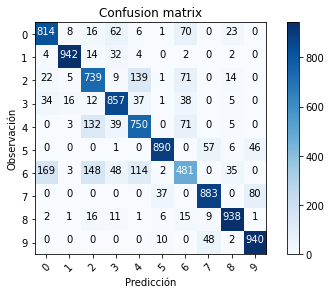

In [ ]:
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

A medida que vamos viendo las distintas matrices, podemos observar que algunas prendas, como la camisa (6) suelen confundirse con otras, como con la camiseta (0) y con el jersey(2).

##Apartado 4

**IMPORTANTE: No ejecutar este entrenamiento ni los siguientes si se entrenó anteriormente la RNA.**

In [ ]:
train_images1= train_images[:50000]
train_labels1=train_labels[:50000]
test_images1=train_images[50000:]
test_labels1=train_labels[50000:]


In [ ]:
network.fit(train_images1, train_labels1, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 1s 4ms/step - loss: 0.4917 - accuracy: 0.8369
Epoch 2/5
391/391 [==============================] - 1s 4ms/step - loss: 0.4786 - accuracy: 0.8402
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.4675 - accuracy: 0.8436
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.4587 - accuracy: 0.8453
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.4513 - accuracy: 0.8489


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images1, test_labels1)

313/313 [==============================] - 1s 3ms/step - loss: 0.4551 - accuracy: 0.8382


In [ ]:
print('Precisión del test:', test_acc)
# test_acc: 0.9777

Precisión del test: 0.8381999731063843


##Apartado 5

Para este apartado, vamos a predecir la imagen 6

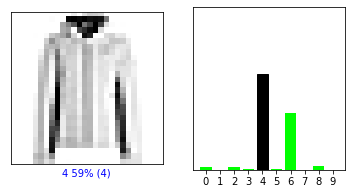

In [ ]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels0, test_images0.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels0)
plt.show()

#Caso 6

En este caso, usamos el optimizador rmsprop.

In [ ]:
network = models.Sequential(name='Modelo_Zalando6')
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,), name='Neurona1'))
network.add(layers.Dense(10, activation='softmax', name='Neurona2'),)
network.summary()

Model: "Modelo_Zalando6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Neurona1 (Dense)             (None, 512)               401920    
_________________________________________________________________
Neurona2 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Exactamente como el caso anterior.

Ahora cambiamos el optimizador.

In [ ]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5585 - accuracy: 0.8020
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3812 - accuracy: 0.8591
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3364 - accuracy: 0.8748
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3126 - accuracy: 0.8854
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2926 - accuracy: 0.8928


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3524 - accuracy: 0.8764


In [ ]:
print('Precisión del test:', test_acc)

Precisión del test: 0.8763999938964844


En este caso, hemos obtenido un 85% de precisión: Un resultado bastante alto en comparación con algunos anteriores. Esta combinación parece buena para la red neuronal. También mejora del caso 2 al aumentar el número de neuronas.

La matriz de confusión:

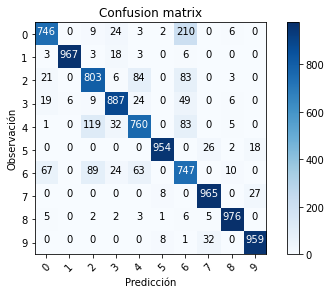

In [ ]:
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

## Apartado 4

**IMPORTANTE: No ejecutar este entrenamiento ni los siguientes si se entrenó anteriormente la RNA.**

In [ ]:
train_images1= train_images[:50000]
train_labels1=train_labels[:50000]
test_images1=train_images[50000:]
test_labels1=train_labels[50000:]


In [ ]:
network.fit(train_images1, train_labels1, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 0.2758 - accuracy: 0.8974
Epoch 2/5
391/391 [==============================] - 2s 4ms/step - loss: 0.2629 - accuracy: 0.9025
Epoch 3/5
391/391 [==============================] - 2s 4ms/step - loss: 0.2522 - accuracy: 0.9063
Epoch 4/5
391/391 [==============================] - 2s 4ms/step - loss: 0.2395 - accuracy: 0.9122
Epoch 5/5
391/391 [==============================] - 2s 4ms/step - loss: 0.2322 - accuracy: 0.9136


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images1, test_labels1)

313/313 [==============================] - 1s 3ms/step - loss: 0.2756 - accuracy: 0.9051


In [ ]:
print('Precisión del test:', test_acc)
# test_acc: 0.9777

Precisión del test: 0.9050999879837036


##Apartado 5

Para este apartado, vamos a predecir la imagen 6

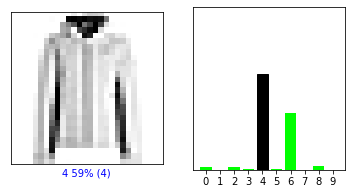

In [ ]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels0, test_images0.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels0)
plt.show()

#Caso 7

Para los dos últimos casos usaremos la función sigmoid y, en este caso, el optimizador sgd.

In [ ]:
network = models.Sequential(name='Modelo_Zalando7')
network.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,), name='Neurona1'))
network.add(layers.Dense(10, activation='softmax', name='Neurona2'),)
network.summary()

Model: "Modelo_Zalando7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Neurona1 (Dense)             (None, 512)               401920    
_________________________________________________________________
Neurona2 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Volvemos a cambiar el optimizador:

In [ ]:
network.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.6941 - accuracy: 0.5788
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 1.1213 - accuracy: 0.7131
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.9216 - accuracy: 0.7328
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.8214 - accuracy: 0.7433
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7607 - accuracy: 0.7520


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.7492 - accuracy: 0.7503


In [ ]:
print('Precisión del test:', test_acc)

Precisión del test: 0.7502999901771545


Aquí, como en el caso 3, ha vuelto a bajar la probabilidad como en el caso anterior. Pero, como en todos los casos con más neuronas, el caso 7  tiene mayor precisión que el caso 3.

Y la matriz de confusión del caso 7 es la siguiente:


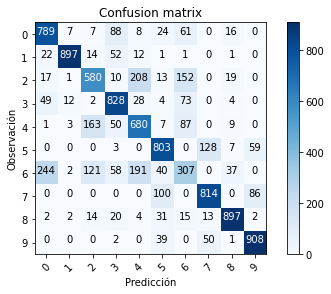

In [ ]:
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se pueden apreciar más fallos que en el caso 6.

##Apartado 4

**IMPORTANTE: No ejecutar este entrenamiento ni los siguientes si se entrenó anteriormente la RNA.**

In [ ]:
train_images1= train_images[:50000]
train_labels1=train_labels[:50000]
test_images1=train_images[50000:]
test_labels1=train_labels[50000:]


In [ ]:
network.fit(train_images1, train_labels1, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 1s 4ms/step - loss: 0.7219 - accuracy: 0.7609
Epoch 2/5
391/391 [==============================] - 1s 4ms/step - loss: 0.6948 - accuracy: 0.7665
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.6730 - accuracy: 0.7721
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.6546 - accuracy: 0.7778
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.6388 - accuracy: 0.7824


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images1, test_labels1)

313/313 [==============================] - 1s 3ms/step - loss: 0.6329 - accuracy: 0.7787


In [ ]:
print('Precisión del test:', test_acc)
# test_acc: 0.9777

Precisión del test: 0.7786999940872192


##Apartado 5

Para este apartado, vamos a predecir la imagen 6

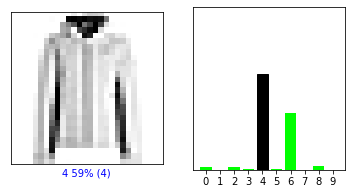

In [ ]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels0, test_images0.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels0)
plt.show()

#Caso 8

Ahora usamos el optimizador rmsprop y, a juzgar con los casos anteriores, podemos esperar una buena precisión.

In [ ]:
network = models.Sequential(name='Modelo_Zalando8')
network.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,), name='Neurona1'))
network.add(layers.Dense(10, activation='softmax', name='Neurona2'),)
network.summary()

Model: "Modelo_Zalando8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Neurona1 (Dense)             (None, 512)               401920    
_________________________________________________________________
Neurona2 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Como en los anteriores, no varía. Solo se ven diferencias en los resultados de fit y en el test.

Usamos el optimizador ya mencionado rmsprop:


In [ ]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5942 - accuracy: 0.7898
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4277 - accuracy: 0.8449
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3866 - accuracy: 0.8600
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3609 - accuracy: 0.8693
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3400 - accuracy: 0.8749


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3749 - accuracy: 0.8662


In [ ]:
print('Precisión del test:', test_acc)

Precisión del test: 0.8661999702453613


Era de esperar obtener un resultado parecido al 85% después de todas las pruebas anteriores

Y para acabar, la matriz de confusión.

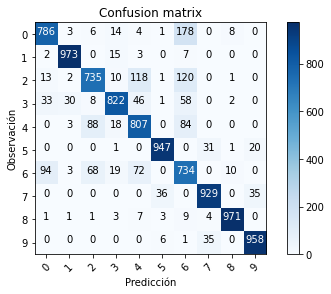

In [ ]:
Y_pred = network.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

##Apartado 4

**IMPORTANTE: No ejecutar este entrenamiento ni los siguientes si se entrenó anteriormente la RNA.**

In [ ]:
train_images1= train_images[:50000]
train_labels1=train_labels[:50000]
test_images1=train_images[50000:]
test_labels1=train_labels[50000:]


In [ ]:
network.fit(train_images1, train_labels1, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 0.3230 - accuracy: 0.8811
Epoch 2/5
391/391 [==============================] - 2s 4ms/step - loss: 0.3092 - accuracy: 0.8864
Epoch 3/5
391/391 [==============================] - 2s 4ms/step - loss: 0.2978 - accuracy: 0.8888
Epoch 4/5
391/391 [==============================] - 2s 4ms/step - loss: 0.2877 - accuracy: 0.8931
Epoch 5/5
391/391 [==============================] - 2s 4ms/step - loss: 0.2779 - accuracy: 0.8975


In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images1, test_labels1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3273 - accuracy: 0.8781


In [ ]:
print('Precisión del test:', test_acc)
# test_acc: 0.9777

Precisión del test: 0.8780999779701233


##Apartado 5

Para este apartado, vamos a predecir la imagen 6

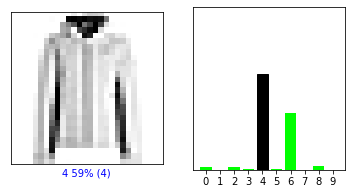

In [ ]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels0, test_images0.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels0)
plt.show()

# Caso 2* y 7*

A continuación veremos qué pasa si en los casos 2 y 7 ponemos 25 épocas

In [ ]:
network = models.Sequential(name='Modelo_Zalando2')
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,), name='Neurona1'))
network.add(layers.Dense(10, activation='softmax', name='Neurona2'),)
network.summary()


Model: "Modelo_Zalando2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Neurona1 (Dense)             (None, 10)                7850      
_________________________________________________________________
Neurona2 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 2s 4ms/step - loss: 0.8986 - accuracy: 0.7146
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 0.5312 - accuracy: 0.8209
Epoch 3/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4730 - accuracy: 0.8380
Epoch 4/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4434 - accuracy: 0.8466
Epoch 5/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4273 - accuracy: 0.8520
Epoch 6/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4165 - accuracy: 0.8545
Epoch 7/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4088 - accuracy: 0.8575
Epoch 8/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4016 - accuracy: 0.8601
Epoch 9/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3973 - accuracy: 0.8625
Epoch 10/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3918 - accuracy: 0.8634

In [ ]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4287 - accuracy: 0.8500


In [ ]:
print('Precisión del test:', test_acc)

Precisión del test: 0.8500000238418579


Para el caso 2, aumenta ligeramente la precisión. Ahora veremos que pasa con el caso 7:

In [ ]:
network = models.Sequential(name='Modelo_Zalando7')
network.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,), name='Neurona1'))
network.add(layers.Dense(10, activation='softmax', name='Neurona2'),)
network.summary()

Model: "Modelo_Zalando7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Neurona1 (Dense)             (None, 512)               401920    
_________________________________________________________________
Neurona2 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 2s 4ms/step - loss: 1.7157 - accuracy: 0.5768
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 1.1331 - accuracy: 0.7129
Epoch 3/25
469/469 [==============================] - 2s 3ms/step - loss: 0.9253 - accuracy: 0.7336
Epoch 4/25
469/469 [==============================] - 2s 4ms/step - loss: 0.8223 - accuracy: 0.7449
Epoch 5/25
469/469 [==============================] - 2s 4ms/step - loss: 0.7608 - accuracy: 0.7542
Epoch 6/25
469/469 [==============================] - 2s 3ms/step - loss: 0.7189 - accuracy: 0.7616
Epoch 7/25
469/469 [==============================] - 2s 4ms/step - loss: 0.6879 - accuracy: 0.7676
Epoch 8/25
469/469 [==============================] - 2s 3ms/step - loss: 0.6635 - accuracy: 0.7746
Epoch 9/25
469/469 [==============================] - 2s 4ms/step - loss: 0.6434 - accuracy: 0.7800
Epoch 10/25
469/469 [==============================] - 2s 4ms/step - loss: 0.6265 - accuracy: 0.7865

In [ ]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5329 - accuracy: 0.8125


In [ ]:
print('Precisión del test:', test_acc)

Precisión del test: 0.8125


Al igual que en el caso 2, la precisión ha aumentado, pero de manera diferente.

En el caso del 2, ha aumentado hasta que se ha quedado estancado en el 85-87% de precisión. Pero, en el erntrenamiento del caso 7, la progresión ha sido lineal. Esto se deberá a las distintas combinaciones de función de activación y optimizador.